In [1]:
from lender_main import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

df = read_full_data()

df.shape

(2945384, 105)

In [2]:
df = create_lenders_labels(df)

In [6]:
potentials = df[df['dollar_zeros?']]

In [5]:
from fulldata_pipeline_0811 import *

In [9]:
potentials.head().T

,204,217,516,533,534
FUND_ACCOUNT_ID,262310,748188,640977,949368,955553
LOGIN_ID,262310,748188,640977,949368,955553
VINTAGE_YEAR,2008,2010,2009,2011,2011
VINTAGE_MONTH,200803,201008,200912,201107,201107
VINTAGE_DATE,2008-03-08 00:00:00.000 -0800,2010-08-23 00:00:00.000 -0700,2009-12-30 00:00:00.000 -0800,2011-07-08 00:00:00.000 -0700,2011-07-22 00:00:00.000 -0700
FIRST_TRANSACTION_DATE,2013-12-23 00:00:00.000 -0800,2016-11-29 00:00:00.000 -0800,2015-09-18 00:00:00.000 -0700,NaN,NaN
FIRST_DEPOSIT_DATE,2013-12-23 00:00:00.000 -0800,2016-11-29 00:00:00.000 -0800,2015-09-18 00:00:00.000 -0700,NaN,NaN
LAST_TRANSACTION_DATE,2013-12-23 00:00:00.000 -0800,2016-11-29 00:00:00.000 -0800,2015-09-18 00:00:00.000 -0700,NaN,NaN
LAST_LOGIN_DATE,2014-02-01 00:00:00.000 -0800,2016-11-29 00:00:00.000 -0800,2015-12-01 00:00:00.000 -0800,2011-07-08 00:00:00.000 -0700,2011-08-08 00:00:00.000 -0700
ACTIVE_LIFETIME_MONTHS,0,0,0,NaN,NaN


In [16]:
loan_regions = ['NUM_DISTINCT_COUNTRIES_LENT_TO',
                       'NUM_AFRICA_LOANS',
                       'NUM_ASIA_LOANS',
                       'NUM_CENTRAL_AMERICA_LOANS',
                       'NUM_EASTERN_EUROPE_LOANS',
                       'NUM_NORTH_AMERICA_LOANS',
                       'NUM_OCEANIA_LOANS',
                       'NUM_SOUTH_AMERICA_LOANS']
loan_preference = ['NUM_EXPIRING_SOON_LOANS',
                       'NUM_SECTOR_AGRICULTURE_LOANS',
                       'NUM_SECTOR_TRANSPORTATION_LOANS',
                       'NUM_SECTOR_SERVICE_LOANS',
                       'NUM_SECTOR_CLOTHING_LOANS',
                       'NUM_SECTOR_HEALTH_LOANS',
                       'NUM_SECTOR_RETAIL_LOANS',
                       'NUM_SECTOR_MANUFACTURING_LOANS',
                       'NUM_SECTOR_ARTS_LOANS',
                       'NUM_SECTOR_HOUSING_LOANS',
                       'NUM_SECTOR_FOOD_LOANS',
                       'NUM_SECTOR_WHOLESALE_LOANS',
                       'NUM_SECTOR_CONSTRUCTION_LOANS',
                       'NUM_SECTOR_EDUCATION_LOANS',
                       'NUM_SECTOR_PERSONAL_USE_LOANS',
                       'NUM_SECTOR_ENTERTAINMENT_LOANS',
                       'NUM_BUNDLE_GREEN_LOANS',
                       'NUM_BUNDLE_HIGHER_ED_LOANS',
                       'NUM_BUNDLE_ISLAMIC_FINANCE_LOANS',
                       'NUM_BUNDLE_YOUTH_LOANS',
                       'NUM_BUNDLE_STARTUP_LOANS',
                       'NUM_BUNDLE_WATER_LOANS',
                       'NUM_BUNDLE_VULNERABLE_LOANS',
                       'NUM_BUNDLE_FAIR_TRADE_LOANS',
                       'NUM_BUNDLE_MOBILE_TECH_LOANS',
                       'NUM_BUNDLE_RURAL_LOANS',
                       'NUM_BUNDLE_UNDERFUNDED_LOANS',
                       'NUM_BUNDLE_CONFLICT_ZONE_LOANS',
                       'NUM_BUNDLE_JOB_CREATION_SME_LOANS',
                       'NUM_BUNDLE_GROWING_BUSINESSES_LOANS',
                       'NUM_BUNDLE_HEALTH_LOANS',
                       'NUM_BUNDLE_DISASTER_RECOVERY_LOANS',
                       'NUM_BUNDLE_INNOVATIVE_LOANS',
                       'NUM_BUNDLE_REFUGEE_LOANS',
                       'NUM_BUNDLE_SOCIAL_ENTERPRISE_LOANS',
                       'NUM_BUNDLE_CLEAN_ENERGY_LOANS',
                       'NUM_BUNDLE_SOLAR_LOANS']

In [12]:
ids = ['FUND_ACCOUNT_ID', 'LOGIN_ID']
first_loans_nans = ['FIRST_LOAN_PURCHASE_WEIGHTED_AVERAGE_TERM',
                        'NUMBER_OF_LOANS_IN_FIRST_LOAN_CHECKOUT',
                        'NUMBER_OF_FIRST_LOANS_STILL_OUTSTANDING',
                        'PERCENT_FIRST_LOANS_EXPIRED',
                        'PERCENT_FIRST_LOANS_DEFAULTED',
                        'PERCENT_FIRST_LOANS_REPAID'
                        ]

In [14]:
contain_na = ['LIFETIME_DEPOSIT_NUM',
                                'LIFETIME_ACCOUNT_LOAN_PURCHASE_NUM',
                                'LIFETIME_PROXY_LOAN_PURCHASE_NUM',
                                'LIFETIME_DONATION_NUM',
                                'CORE_LOAN_PURCHASE_NUM',
                                'CORE_LOAN_PURCHASE_TOTAL',
                                'DIRECT_LOAN_PURCHASE_NUM',
                                'DIRECT_LOAN_PURCHASE_TOTAL']

In [17]:
p = convert_datetime(potentials)
p = convert_to_peroid(p)
p = convert_cat_into_int(p)
p = p.drop(loan_preference+loan_regions+first_loans_nans+ids+contain_na,axis=1)


In [20]:
p = dummify(p)

In [18]:
p.shape

(1107783, 45)

In [19]:
p.head()

,FIRST_TRANSACTION_DATE,FIRST_DEPOSIT_DATE,LAST_TRANSACTION_DATE,ACTIVE_LIFETIME_MONTHS,ACCOUNT_AGE_MONTHS,FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY,FIRST_TRANSACTION_REFERRAL,IS_CORPORATE_CAMPAIGN_USER,IS_FREE_TRIAL_USER,FIRST_BASKET_CATEGORY,...,NUM_TEAM_LOANS,NUM_TEAM_MESSAGES,NUM_LOAN_COMMENTS,NUM_JOURNAL_COMMENTS,NUM_STATEMENT_COMMENTS,dollar_outliers?,team_outliers?,comments_outliers?,dollar_zeros?,last_login_today_months
204,2013-12-23 00:00:00.000 -0800,2013-12-23 00:00:00.000 -0800,2013-12-23 00:00:00.000 -0800,0.0,122,kiva,direct,0,0,Depositor - Other,...,0,0,0,0,0,False,False,False,True,51
217,2016-11-29 00:00:00.000 -0800,2016-11-29 00:00:00.000 -0800,2016-11-29 00:00:00.000 -0800,0.0,93,kiva,marketing,0,0,Donor,...,0,0,0,0,0,False,False,False,True,17
516,2015-09-18 00:00:00.000 -0700,2015-09-18 00:00:00.000 -0700,2015-09-18 00:00:00.000 -0700,0.0,101,kiva,search,0,0,Depositor - Other,...,0,0,0,0,0,False,False,False,True,29
533,NaN,NaN,NaN,NaN,82,none,unknown,0,0,Zombie,...,0,0,0,0,0,False,False,False,True,82
534,NaN,NaN,NaN,NaN,82,none,unknown,0,0,Zombie,...,0,0,0,0,0,False,False,False,True,81


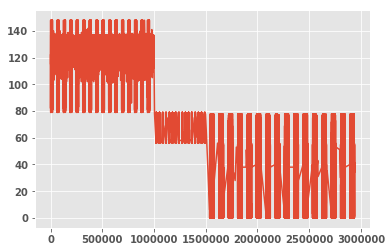

In [26]:
plt.plot(p['ACCOUNT_AGE_MONTHS'])

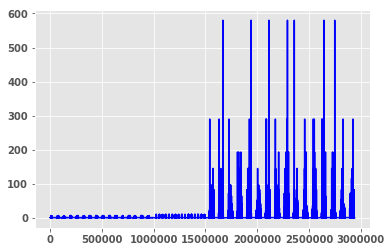

In [29]:
plt.plot(p['last_login_today_months']/p['ACCOUNT_AGE_MONTHS'],color="b")

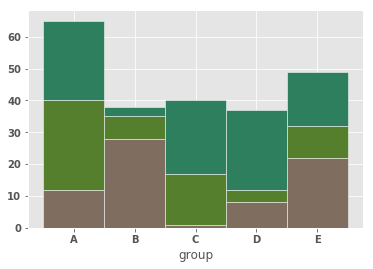

In [25]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2 (TO DO better)
bars = [40, 35, 17, 12, 32]
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()
